# Analysis for Industry 4.0 project 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE

In [56]:
df = pd.read_csv("Extended_Employee_Performance_and_Productivity_Data.csv")

In [57]:
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [58]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [59]:
df.dtypes

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object

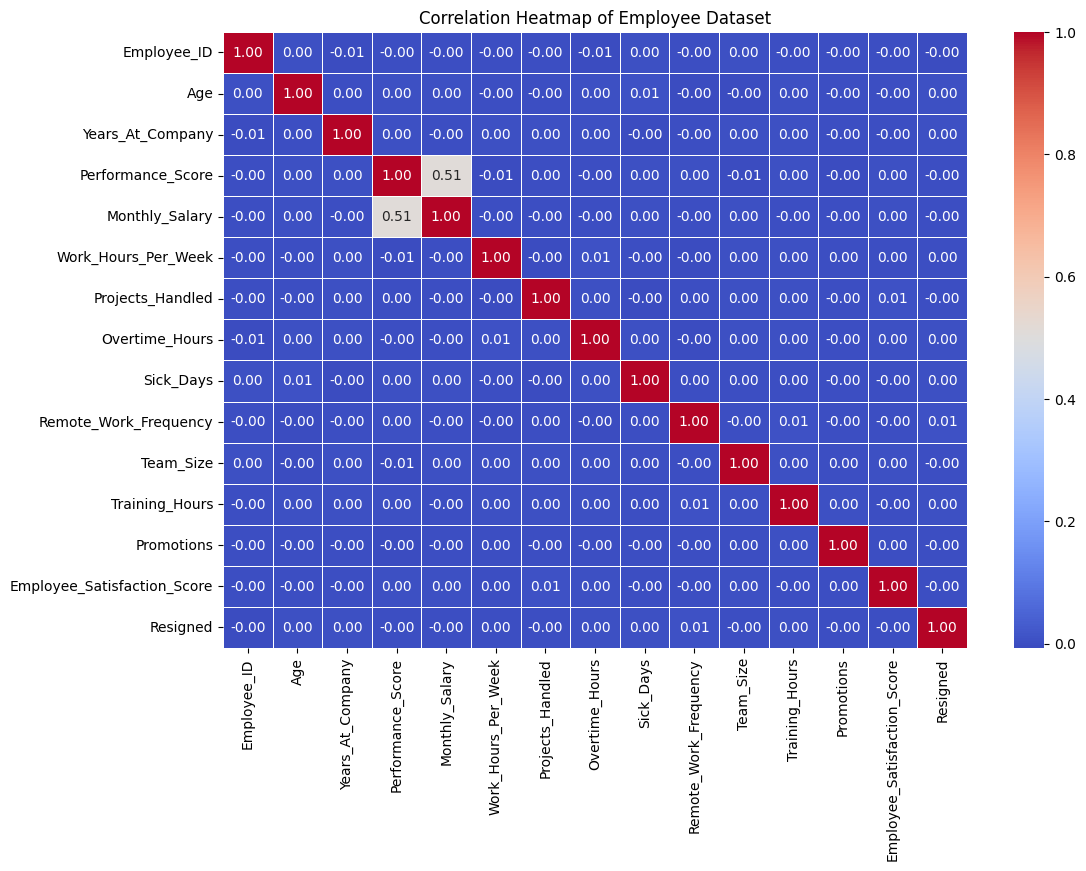

In [60]:
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'bool'])

correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Employee Dataset')

plt.show()

In [61]:
# Check for null values
print("Null Values:")
display(df.isnull().sum())

# Check for duplicates
print("\n Duplicate Rows:", df.duplicated().sum())

# Convert Hire_Date to datetime
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')

# Recalculate Years_At_Company
current_year = pd.Timestamp.now().year
df['Years_At_Company_Calculated'] = current_year - df['Hire_Date'].dt.year

# Identify discrepancies between given and recalculated years
df['Years_Match'] = df['Years_At_Company'] == df['Years_At_Company_Calculated']

print("\n❗ Discrepancies in Years_At_Company:")
display(df[~df['Years_Match']][['Hire_Date', 'Years_At_Company', 'Years_At_Company_Calculated']])



Null Values:


Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


 Duplicate Rows: 0

❗ Discrepancies in Years_At_Company:


,Hire_Date,Years_At_Company,Years_At_Company_Calculated
0,2022-01-19 08:03:05.556036,2,3
1,2024-04-18 08:03:05.556036,0,1
2,2015-10-26 08:03:05.556036,8,10
3,2016-10-22 08:03:05.556036,7,9
4,2021-07-23 08:03:05.556036,3,4
...,...,...,...
99995,2022-12-07 08:03:05.556036,1,3
99996,2018-07-24 08:03:05.556036,6,7
99997,2015-11-24 08:03:05.556036,8,10
99998,2015-08-03 08:03:05.556036,9,10


**Doing some feature eng creating new colomn fro better analysis**


In [62]:
# Feature Engineering
df['Salary_Per_Hour'] = df['Monthly_Salary'] / (df['Work_Hours_Per_Week'] * 4)
df['Promotion_Rate'] = df['Promotions'] / (df['Years_At_Company'] + 1)  # Avoid division by zero
df['Perf_Tenure_Interaction'] = df['Performance_Score'] * df['Years_At_Company']

# Check new features
df[['Salary_Per_Hour', 'Promotion_Rate', 'Perf_Tenure_Interaction']].describe()


,Salary_Per_Hour,Promotion_Rate,Perf_Tenure_Interaction
count,100000.000000,100000.000000,100000.000000
mean,37.126046,0.294458,13.414240
std,11.246450,0.416555,11.432528
min,16.041667,0.000000,0.000000
25%,28.676471,0.000000,4.000000
50%,35.546875,0.200000,10.000000
75%,43.882979,0.333333,20.000000
max,75.000000,2.000000,50.000000


In [63]:
# Drop irrelevant columns
df = df.drop(columns=['Employee_ID'])

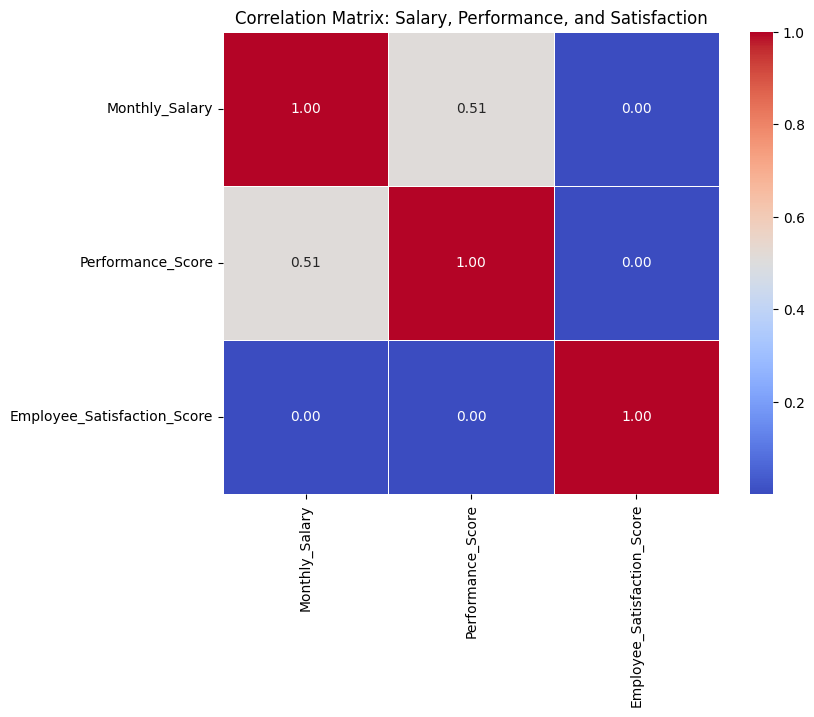

In [64]:
# Select relevant numeric columns
corr_cols = ['Monthly_Salary', 'Performance_Score', 'Employee_Satisfaction_Score']
corr_matrix = df[corr_cols].corr(method='pearson')

# Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Salary, Performance, and Satisfaction')
plt.show()


In [65]:
from scipy.stats import chi2_contingency

# Chi-square test: Resigned vs Monthly_Salary
job_title_ct = pd.crosstab(df['Monthly_Salary'], df['Resigned'])
chi2, p, dof, expected = chi2_contingency(job_title_ct)

print("Chi-Square Test: Resigned vs Monthly_Salary")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

# Check significance level (usually 0.05)
if p < 0.05:
    print("Result: Significant relationship between Monthly_Salary and Resignation.")
else:
    print("Result: No significant relationship between Monthly_Salary and Resignation.")


Chi-Square Test: Resigned vs Monthly_Salary
Chi2 Statistic: 16.470655164833175
P-value: 0.9433737058747477
Result: No significant relationship between Monthly_Salary and Resignation.


**This is for the data imbalace**

In [66]:
# Define features and target
X = df[['Monthly_Salary', 'Performance_Score', 'Employee_Satisfaction_Score']]
y = df['Resigned']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print('Class distribution after SMOTE:', y_resampled.value_counts())

Class distribution after SMOTE: Resigned
False    89990
True     89990
Name: count, dtype: int64


In [69]:
# Encode Education_Level as numeric (for regression)
df['Education_Level_Cat'] = pd.factorize(df['Education_Level'])[0]

# Define features (X) and target (y)
X = df[['Performance_Score', 'Education_Level_Cat', 'Years_At_Company']]
y = df['Monthly_Salary']

# Add constant term for intercept
X = sm.add_constant(X)

# Build and fit the model
model = sm.OLS(y, X).fit()

# Summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Monthly_Salary   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        03:52:39   Log-Likelihood:            -8.4927e+05
No. Observations:              100000   AIC:                         1.699e+06
Df Residuals:                   99996   BIC:                         1.699e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4916.6779    

In [71]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
print('Logistic Regression Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.50      0.55      0.52     26904
        True       0.50      0.45      0.47     27090

    accuracy                           0.50     53994
   macro avg       0.50      0.50      0.50     53994
weighted avg       0.50      0.50      0.50     53994

Confusion Matrix:
[[14721 12183]
 [15005 12085]]


**Goal: Predict who is likely to resign based on salary, performance, and satisfaction.**

Confusion Matrix:
[[26969     0]
 [ 3031     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     26969
           1       0.00      0.00      0.00      3031

    accuracy                           0.90     30000
   macro avg       0.45      0.50      0.47     30000
weighted avg       0.81      0.90      0.85     30000


Accuracy Score: 0.8989666666666667


/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ashutosh/Codes/Projects/I4_project/env_i4/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

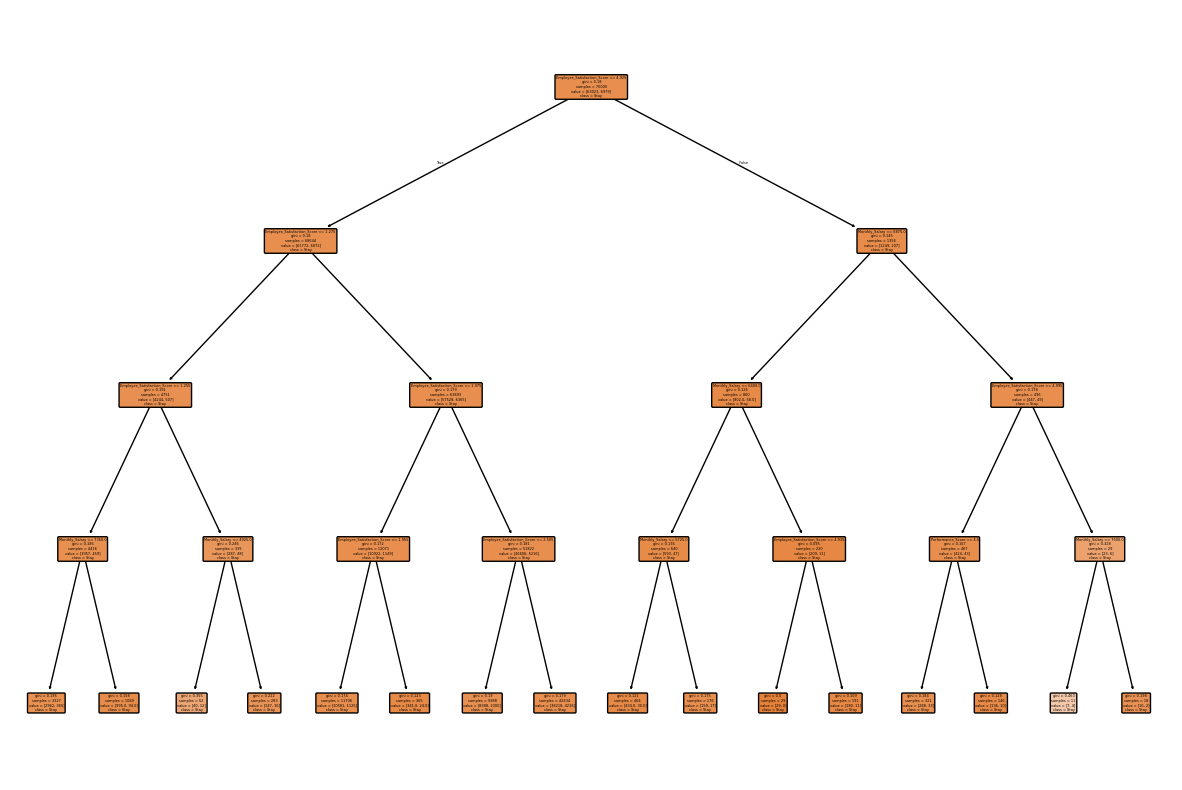

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Define features (X) and target (y)
X = df[['Monthly_Salary', 'Performance_Score', 'Employee_Satisfaction_Score']]
y = df['Resigned'].astype(int)  # Ensure binary (0 or 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Stay', 'Resign'], filled=True, rounded=True)
plt.show()


**Goal: Predict salaries based on Performance Scores, Promotions, and Years at the Company.**

Model Coefficients: [4.93792795e+02 4.45903536e+00 4.82035600e-01]
Intercept: 4914.561606610151

Mean Squared Error (MSE): 1388755.7102091094
R-squared: 0.26236839171171145


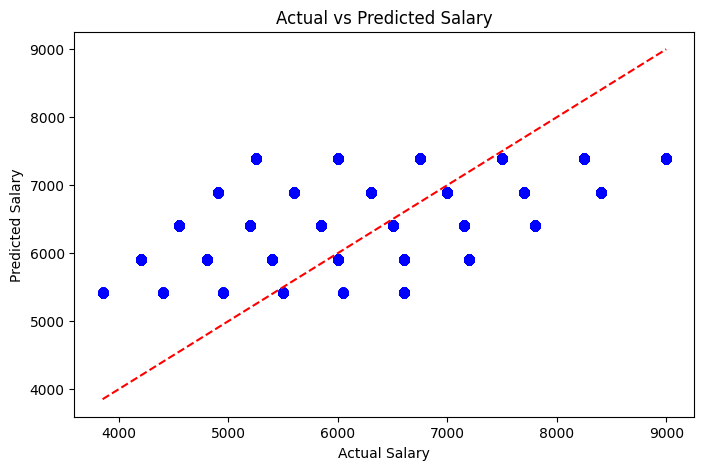

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['Performance_Score', 'Promotions', 'Years_At_Company']]
y = df['Monthly_Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predictions
y_pred = reg_model.predict(X_test)

# Model evaluation
print("Model Coefficients:", reg_model.coef_)
print("Intercept:", reg_model.intercept_)

print("\nMean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Visualization of Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Salary')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()


In [75]:
# Create performance tiers based on quantiles
def performance_tier(score):
    if score <= df['Performance_Score'].quantile(0.33):
        return 'Low'
    elif score <= df['Performance_Score'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

df['Performance_Tier'] = df['Performance_Score'].apply(performance_tier)

# Calculate salary ranges for each Job_Title and Performance_Tier
salary_ranges = df.groupby(['Job_Title', 'Performance_Tier'])['Monthly_Salary'].agg(['min', 'max', 'mean']).reset_index()

print("Salary Ranges by Job Title and Performance Tier:")
print(salary_ranges)


Salary Ranges by Job Title and Performance Tier:
     Job_Title Performance_Tier     min     max         mean
0      Analyst             High  6000.0  6000.0  6000.000000
1      Analyst              Low  4400.0  4800.0  4601.148026
2      Analyst           Medium  5200.0  5600.0  5399.614508
3   Consultant             High  8250.0  8250.0  8250.000000
4   Consultant              Low  6050.0  6600.0  6320.980806
5   Consultant           Medium  7150.0  7700.0  7424.706927
6    Developer             High  7500.0  7500.0  7500.000000
7    Developer              Low  5500.0  6000.0  5745.725750
8    Developer           Medium  6500.0  7000.0  6746.832101
9     Engineer             High  9000.0  9000.0  9000.000000
10    Engineer              Low  6600.0  7200.0  6902.552286
11    Engineer           Medium  7800.0  8400.0  8094.083045
12     Manager             High  9000.0  9000.0  9000.000000
13     Manager              Low  6600.0  7200.0  6894.941770
14     Manager           Medium  780

In [76]:
# Define bonus percentages
def calculate_bonus(row):
    if row['Performance_Tier'] == 'High':
        return row['Monthly_Salary'] * 0.20
    elif row['Performance_Tier'] == 'Medium':
        return row['Monthly_Salary'] * 0.10
    else:
        return 0

df['Bonus'] = df.apply(calculate_bonus, axis=1)

# View employees with their bonuses
print(df[['Job_Title', 'Performance_Tier', 'Monthly_Salary', 'Bonus']].head())


    Job_Title Performance_Tier  Monthly_Salary   Bonus
0  Specialist             High          6750.0  1350.0
1   Developer             High          7500.0  1500.0
2  Specialist           Medium          5850.0   585.0
3     Analyst              Low          4800.0     0.0
4     Analyst              Low          4800.0     0.0


In [77]:
def non_monetary_rewards(row):
    if row['Performance_Tier'] == 'High':
        return ['Extra Training', 'Flex Hours', 'Recognition']
    elif row['Performance_Tier'] == 'Medium':
        return ['Extra Training', 'Mentorship']
    else:
        return ['Mentorship']

df['Non_Monetary_Rewards'] = df.apply(non_monetary_rewards, axis=1)

print(df[['Job_Title', 'Performance_Tier', 'Non_Monetary_Rewards']].head())


    Job_Title Performance_Tier                       Non_Monetary_Rewards
0  Specialist             High  [Extra Training, Flex Hours, Recognition]
1   Developer             High  [Extra Training, Flex Hours, Recognition]
2  Specialist           Medium               [Extra Training, Mentorship]
3     Analyst              Low                               [Mentorship]
4     Analyst              Low                               [Mentorship]
